<a href="https://colab.research.google.com/github/Shatha-1/IT326-Project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading
Load the Preprocessed Data and the necessary libraries.

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv("Preprocessed_DataSet.csv")
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    float64
 1   Age                                    502 non-null    float64
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    float64
 5   Dietary Habits                         502 non-null    float64
 6   Have you ever had suicidal thoughts ?  502 non-null    float64
 7   Study Hours                            502 non-null    float64
 8   Financial Stress                       502 non-null    float64
 9   Family History of Mental Illness       502 non-null    float64
 10  Depression                             502 non-null    float64
dtypes: flo

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,0.6250,0.25,0.75,1.0,1.0,1.0,0.750000,0.25,1.0,0.0
1,1.0,0.6250,0.75,1.00,0.0,0.0,1.0,0.583333,0.00,1.0,0.0
2,1.0,0.4375,0.00,0.50,0.0,2.0,1.0,0.833333,0.75,0.0,1.0
3,1.0,0.3125,0.00,0.75,3.0,2.0,1.0,0.583333,0.25,1.0,0.0
4,0.0,0.8125,0.00,1.00,3.0,0.0,1.0,0.333333,0.25,1.0,0.0


#Define the dependent and independent variables

In [52]:
#Separate Features and Target

X = df.drop("Depression", axis=1)
y = df["Depression"]






*   The independent variables (X) represent all the input attributes used by the model to learn patterns. These include factors such as academic pressure, sleep duration, study satisfaction, and other mental-health-related measurements.
*   The dependent variable (y) is the outcome we want to predict — in this case, the Depression status of each student (0 = Not depressed, 1 = Depressed).



#Training and Evaluating Decision Tree (Gini) Across Different Train-Test Splits

In [53]:
# Define train/test splits
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
results = []

for train_ratio, test_ratio in splits:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=42
    )

     # Train Decision Tree (Gini)
    model = DecisionTreeClassifier(criterion="gini", random_state=45)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Accuracy
    acc = model.score(X_test, y_test)

     # Save results
    results.append([f"{int(train_ratio*100)}/{int(test_ratio*100)}", acc])

    # Create results table
    results_df = pd.DataFrame(results, columns=["Train/Test Split", "Accuracy"])
results_df

,Train/Test Split,Accuracy
0,90/10,0.862745
1,80/20,0.900990
2,70/30,0.847682


we train a Decision Tree classifier using the Gini impurity measure on three different train-test partitions: 90/10, 80/20, and 70/30. For each split, the model is trained on the training data and then evaluated on the unseen test data to measure its generalization performance. The accuracy for each partition is recorded in a results table

#Visualize confusion matrices

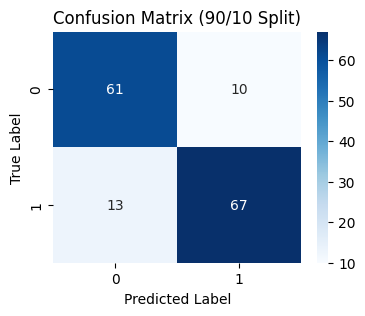

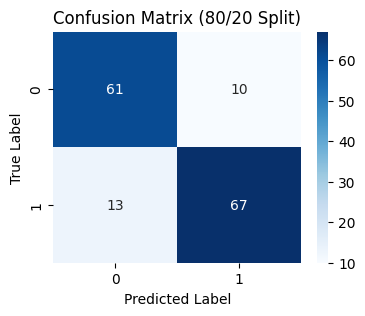

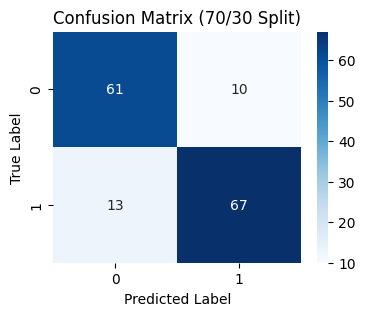

In [54]:



for train_ratio, test_ratio in splits:


    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int(train_ratio*100)}/{int(test_ratio*100)} Split)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


The confusion matrices across the three splits show a consistently high number of correct predictions, with only a few misclassifications. This indicates that the Decision Tree model performs reliably and generalizes well across different training sizes.